In [15]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pickle

In [16]:
# read Jan 2021 FHV data 
df = pd.read_parquet("../data/fhv_tripdata_2021-01.parquet")
#df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2021-01.parquet")

In [17]:
print("Number of Records in Jan 2021 FHV data:", len(df))

Number of Records in Jan 2021 FHV data: 1154112


In [18]:
# let's check out the columns in the df
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[us]
 2   dropOff_datetime        1154112 non-null  datetime64[us]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[us](2), float64(2), object(3)
memory usage: 61.6+ MB


In [20]:
# let's calculate duration of each trip
df["duration"] = df["dropOff_datetime"] - df["pickup_datetime"]
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13


In [21]:
# convert duration into minutes
df["duration"] = df["duration"].apply(lambda x: x.total_seconds() / 60)
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [22]:
print("Average duration in Jan 2021 FHV:", round(df["duration"].mean(),2))

Average duration in Jan 2021 FHV: 19.17


In [23]:
print(f"Fractions of missing values of the pickup location ID: {round(df.PUlocationID.isnull().mean()*100, 2)}%")

Fractions of missing values of the pickup location ID: 83.03%


In [24]:
df["PUlocationID"].fillna("-1", inplace=True)
df["DOlocationID"].fillna("-1", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[us]
 2   dropOff_datetime        1154112 non-null  datetime64[us]
 3   PUlocationID            1154112 non-null  object        
 4   DOlocationID            1154112 non-null  object        
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
 7   duration                1154112 non-null  float64       
dtypes: datetime64[us](2), float64(1), object(5)
memory usage: 70.4+ MB


/tmp/ipykernel_846/464608401.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["duration"])


<Axes: xlabel='duration', ylabel='Density'>

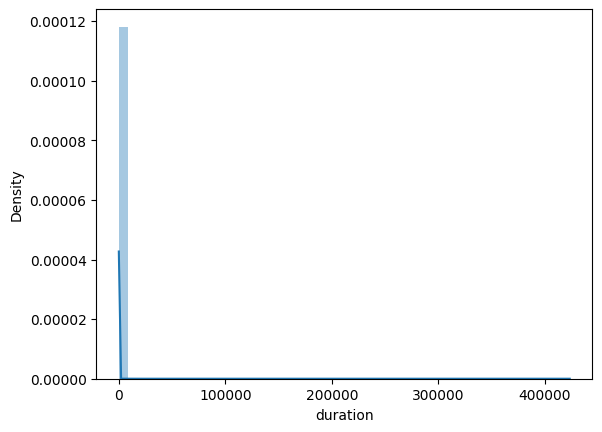

In [25]:
import seaborn as sns
sns.distplot(df["duration"])

In [26]:
df["duration"].describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [27]:
df["duration"].describe(percentiles=[0.25, 0.90, 0.95, 0.98, 0.99])

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
90%      3.563333e+01
95%      4.725000e+01
98%      6.613333e+01
99%      9.030000e+01
max      4.233710e+05
Name: duration, dtype: float64

Maximum trip is 42,337 minutes, equivalent to 294 days and minimum is 0.017 minutes. Let's filter down the data to be more than 4 mins and less than 95 mins

In [28]:
print("Total % records for filtered data: {}%".format(round(((df["duration"] >= 4) & (df["duration"] <= 95)).mean()*100, 2)))

Total % records for filtered data: 90.44%


In [29]:
df["duration"].describe(percentiles=[0.95, 0.98, 0.99])

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
50%      1.340000e+01
95%      4.725000e+01
98%      6.613333e+01
99%      9.030000e+01
max      4.233710e+05
Name: duration, dtype: float64

### Pulling input_data together

In [30]:
def read_data(file:str):
    df = pd.read_parquet(file)
    print("Number of Records in data:", len(df))
    
    # get duration
    df["duration"] = df["dropOff_datetime"] - df["pickup_datetime"]
    # convert duration to minutes
    df["duration"] = df["duration"].apply(lambda x: x.total_seconds() / 60)
    print("Average duration in data:", round(df["duration"].mean(),2))
    print(f"Fractions of missing values of the pickup location ID: {round(sum(df.PUlocationID.isnull())/len(df.PUlocationID)*100, 2)}%")

    # fill na
    df["PUlocationID"].fillna("-1", inplace=True)
    df["DOlocationID"].fillna("-1", inplace=True)

    df[['PUlocationID', 'DOlocationID']] = df[['PUlocationID', 'DOlocationID']].astype(str)
    df['PU_DO'] = df['PUlocationID'] + '_' + df['DOlocationID']

    df = df[(df["duration"] >= 4) & (df["duration"] <= 95)]

    return df

In [31]:
df_train = read_data("../data/fhv_tripdata_2021-01.parquet")

Number of Records in data: 1154112
Average duration in data: 19.17
Fractions of missing values of the pickup location ID: 83.03%


### One-hot encoding

In [32]:
# lets extrain X_train data in dictionary form
X_train_dict = df_train[["PUlocationID", "DOlocationID"]].to_dict(orient="records")

In [33]:
# initialize vectorizer 
dv = DictVectorizer()

# one-hot encoding
X_train = dv.fit_transform(X_train_dict)

In [34]:
print("Dimensionality of X_train:", X_train.shape)

Dimensionality of X_train: (1043765, 525)


In [35]:
# target variable
y_train = df_train["duration"]

### Fit the model!

In [36]:
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
# get the y_pred from X_train
y_pred = lr.predict(X_train)

# get RMSE
print("RMSE for training data:", round(mean_squared_error(y_train, y_pred, squared=False),2))

RMSE for training data: 12.36


In [38]:
df_val = read_data("../data/fhv_tripdata_2021-02.parquet")

# lets extrain X_train data in dictionary form
X_val_dict = df_val[["PU_DO"]].to_dict(orient="records")

# one-hot encoding
X_val = dv.transform(X_val_dict)

# y_val
y_val = df_val["duration"]

# get the y_pred from X_val
y_pred = lr.predict(X_val)

# get RMSE
print("RMSE for validation data:", round(mean_squared_error(y_val, y_pred, squared=False),2))

Number of Records in data: 1037692
Average duration in data: 20.71
Fractions of missing values of the pickup location ID: 85.26%
RMSE for validation data: 15.01


### Export Model

In [39]:
with open("models/lin_reg.bin", "wb") as f:
    pickle.dump((dv, lr), f)